In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# without Foil

In [ ]:
deadcols = ['KE', 'cosTh']

In [ ]:
dead_events = pd.read_csv('./energy-costh-deadevents-apr09/dead_events.txt', sep = " ",names = deadcols, header = None )

In [ ]:
cols_dead_thrs = ['KE', 'dESci1', 'dESci2', 'cosTh']

In [ ]:
dead_events_bcz_of_threshold = pd.read_csv('../apr/energy-costh-deadevents-apr09/dead_events_belowThreshold.txt',sep = " ", names = cols_dead_thrs, header = None)

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(dead_events['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'dead events')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 0.5e6)
plt.title(r'$<cos\theta>$ distribution for dead events ', fontsize = 16)
plt.savefig('../apr/cos_th_dead_events.png')


In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(dead_events['KE'], bins = 80, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'dead events')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 0.5e6)
plt.title('Initial KE distribution for dead events ', fontsize = 16)

plt.savefig('../apr/ke_dead_events.png')



In [ ]:
dead_events_bcz_of_threshold.info()

In [ ]:
dead_events_bcz_of_threshold.describe()

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_bcz_of_threshold['KE'], bins = 80, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'dead events')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 0.5e6)
plt.title('Initial KE distribution for dead events ', fontsize = 16)

plt.savefig('../apr/ke_dead_events_duetothr.png')



In [ ]:
#sns.histplot(dead_events_bcz_of_threshold['cosTh'],bins = 20 , log_scale = (False, True))
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_bcz_of_threshold['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False,label = 'dead events')# log_scale=(False, True), )

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
plt.ylim(0, 20000)
plt.title(r'$<cos\theta>$ distribution for dead events due to detector threshold ', fontsize = 16)
plt.savefig('../apr/cos_th_dead_events_duetothr.png')


In [ ]:
sns.histplot(dead_events_bcz_of_threshold['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False)#, log_scale=(False, True), label = 'dead events')


In [ ]:
cols = ['eRconstTot', 'cosTh', 'E1']
type0 = pd.read_csv('../apr/energy-costh-deadevents-apr09/type0_energycosth.txt', sep = " ",header = None, names = cols,dtype=np.float16)#.drop(['E1'], axis = 1)

In [ ]:
type0.head()

In [ ]:
def beta (df): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    
  df['beta'] = np.sqrt((df['eRconstTot']*df['eRconstTot']) + (2*m_e*df['eRconstTot'])) / (m_e + df['eRconstTot'])
     return df

In [ ]:
def betaval (KE): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    beta = np.sqrt((KE*KE) + (2*m_e*KE)) / (m_e + KE)
    return beta


In [ ]:
m_e = 511
type0['beta'] = np.sqrt((type0['eRconstTot']*type0['eRconstTot']) + (2*m_e*type0['eRconstTot'])) / (m_e + type0['eRconstTot'])
  

In [ ]:
m_e = 511
total_energy = type0['eRconstTot'] + m_e

# Calculate beta
type0['beta'] = np.sqrt(total_energy**2 - m_e**2) / total_energy

In [ ]:
type0['betacosth'] = type0['beta']*type0['cosTh']

In [ ]:
betaval(470)

In [ ]:
type0 = beta(type0)

In [ ]:
type0['beta'].isna().sum()

In [ ]:
type0

In [ ]:
del type02

In [ ]:
misbackscattered_only .head()

In [ ]:


misbackscattered_only['Det'] = np.where(misbackscattered_only['E1'] != 0, 1, 2)


In [ ]:
type01 = type0[type0['E1'] != 0].copy().drop('E1', axis = 1)


In [ ]:
type02 = type0[type0['E1'] == 0.0].copy().drop('E1', axis = 1)


In [21]:
#calculating the mean of the binned value
def avgXvsY (df, xAxis, yAxis, nbins, minRange,maxRange) :
    mean_stat = scipy.stats.binned_statistic(x = df[xAxis], values = df[yAxis], statistic='mean', bins = nbins, range = (minRange,maxRange))
    meanY = mean_stat.statistic
    xEdge = mean_stat.bin_edges[1:]
    return xEdge,meanY
    
    

In [ ]:
avgCosMS, eReconstMS = avgEvsCosth(misbackscattered_only, 'cosTh')

In [ ]:
# Define your custom colors
hue_colors = {1: 'gray', 2: 'pink'}
hue_labels = {1: 'deposits energy in Det 1', 2: 'deposits energy in Det 2'}

plt.figure(figsize = (10, 8))

sns.histplot(misbackscattered_only, x='cosTh', color=hue_colors, log_scale=(False, True), bins=20, hue='Det',palette=hue_colors, hue_order=hue_labels,legend=True)
#plt.ylim(-0.01,0.05)
#plt.xlim(0, 800)
plt.xticks(fontsize =14)
plt.yticks(fontsize =12)
plt.xlabel(r'$\cos(\theta)$', fontsize = 16)
plt.ylabel('Rate',fontsize = 16)
#plt.legend()
plt.grid(which = 'major', axis = 'both',linestyle = '--')
plt.title(r' $\cos(\theta) $distribution for mis-scattered type 0 events  ', fontsize = 18)
#plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

In [ ]:
# Define your custom colors
hue_colors = {1: 'blue', 2: 'green'}
hue_labels = {1: 'deposits energy in Det 1', 2: 'deposits energy in Det 2'}

plt.figure(figsize = (10, 8))

sns.histplot(misbackscattered_only, x='eRconstTot', color='blue', log_scale=(False, True), bins=80, hue='Det',palette=hue_colors, hue_order=hue_labels,legend=True)
#plt.ylim(-0.01,0.05)
#plt.xlim(0, 800)
plt.xticks(fontsize =14)
plt.yticks(fontsize =12)
plt.xlabel(R'$E_{RECONST}$', fontsize = 16)
plt.ylabel('Rate',fontsize = 16)
#plt.legend()
plt.grid(which = 'major', axis = 'both',linestyle = '--')
plt.title(r' Reconstructed energy distribution for mis-scattered type 0 events  ', fontsize = 18)
#plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = eReconstMS, y = avgCosMS,  s = 50, facecolors='none', edgecolors='red', label = 'Mis-bs')
plt.ylim(-0.01,0.04)
plt.xlim(0, 800)
plt.xticks(np.arange(0,800,50),fontsize =12)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.grid(which = 'both', axis = 'both',linestyle = '--')
plt.title(r' $\cos(\theta) $distribution for mis-scattered type 0 events  ', fontsize = 18)
#plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

In [ ]:
avgBetaCosth1, Erconst1 = avgEvsCosth(type01, 'betacosth')
avgBetaCosth2, Erconst2 = avgEvsCosth(type02, 'betacosth')

In [ ]:
avgBetaCosth, Erconst = avgEvsCosth(type0, 'betacosth')

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Erconst, y = avgBetaCosth,  s = 70, facecolors='none', edgecolors='blue', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
#plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Erconst1, y = avgBetaCosth1,  s = 70, facecolors='none', edgecolors='blue', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\beta\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\beta\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_btacos_th_distribution_type0_det1.png')
  

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Erconst2, y = avgBetaCosth2,  s = 70, facecolors='none', edgecolors='red', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\beta\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\beta\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_btacos_th_distribution_type0_det2.png')
  

In [ ]:
avgCosTh, Etot = avgEvsCosth(type0)

In [ ]:
avgCosTh1 , E1 =avgEvsCosth(type01)
avgCosTh2 , E2 =avgEvsCosth(type02)

In [ ]:
del type0

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = E1, y = avgCosTh1,  s = 70, facecolors='none', edgecolors='blue', label = 'Detector 1 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det1 Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_cos_th_distribution_type0_det1.png')
  

for smaller energy dposited in the detector 1 only for type 0. the avg costheta increases as a function of 

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'Detector 2 only')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.ylim(-0.55,-0.4)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in det2 Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
plt.savefig('../apr/avg_cos_th_distribution_type0_det2.png')


In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = Etot, y = avgCosTh,  s = 70, facecolors='none', edgecolors='green', label = 'avgcosTh')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,20),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(-0.05,0.01)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Reconstructed for Type 0 ONLY $<\cos(\theta)>$ ', fontsize = 18)
plt.savefig('../apr/avg_cos_th_distribution_type0.png')
  
  

In [ ]:

plt.figure(figsize = (10, 8))
plt.scatter(x = E1, y = avgCosTh1,  s = 70, facecolors='none', edgecolors='g', label = 'avgcosTg 1')
plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'avgcosTg 2')
plt.scatter(x = Etot, y = avgCosTh,  s = 70, facecolors='none', edgecolors='blue', label = 'avgcosTh')

plt.xlim(0, 120)
plt.xticks(np.arange(0,120,10),fontsize =12)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\cos(\theta)>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(-0.05,0.01)
plt.grid(which = 'both', axis = 'both')
plt.title(r'Energy deposited in Type 0 ONLY $\cos(\theta)$ ', fontsize = 18)
  

In [ ]:
type0['poscoth'] =np.abs (type0['cosTh'])

In [ ]:
type0

In [ ]:
costhp,avgE  = avgEvsCosth(type0, 'poscoth')

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x = avgE, y = costhp,  s = 70, facecolors='none', edgecolors='g', label = 'avgcosTg 1')
#plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'avgcosTg 2')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<|\cos(\theta)|>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both', linestyle = '--')
plt.title(r'Reconstructed for Type 0 ONLY $<|\cos(\theta)|>$ ', fontsize = 18)
  
plt.savefig('../apr/abs_avg_cos_th_distribution_type0.png')

In [ ]:

# Convert cos(theta) to theta in degrees
type0['theta'] = np.degrees(np.arccos(type0['cosTh']))


In [ ]:
avg_theta,avg_E  = avgEvsCosth(type0, 'theta')

In [ ]:
avg_E

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x = avgE, y = avg_theta,  s = 70, facecolors='none', edgecolors='g', label = 'avgcosTg 1')
#plt.scatter(x = E2, y = avgCosTh2,  s = 70, facecolors='none', edgecolors='red', label = 'avgcosTg 2')

plt.xlim(0, 800)
plt.xticks(np.arange(0,800,25),fontsize =12, rotation = 45)
plt.yticks(fontsize =12)
plt.ylabel(r'$<\theta>$', fontsize = 16)
plt.xlabel('Reconstructed Energy',fontsize = 16)
plt.legend()
#plt.ylim(0.46,0.55)
plt.grid(which = 'both', axis = 'both', linestyle = '--')
plt.title(r'Reconstructed for Type 0 ONLY $<\theta>$ ', fontsize = 18)
  

In [ ]:
type0.head()

In [ ]:
type0 = type0.drop(['poscoth', 'theta'], axis = 1)
lowType0 = type0[type0['eRconstTot'] < 150].copy()

In [ ]:
lowType0

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(lowType0['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False)
plt.ylim(0,900000 )

In [ ]:
lowType01 = type01[type01['eRconstTot'] < 150].copy()
lowType02 = type02[type02['eRconstTot'] < 150].copy()

In [ ]:
plt.figure(figsize = (10, 8))
sns.histplot(lowType01['cosTh'], bins = 20, element = 'step', color = 'blue', fill = False, log_scale=(False, True), label = 'Detector 1')

sns.histplot(lowType02['cosTh'], bins = 20, element = 'step', color = 'red', fill = False, log_scale=(False, True), label = 'Detector 2')
plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
#plt.ylabel(fontsize = 14)
plt.grid(linestyle = '--')
plt.ylim(0, 1e7)
plt.title(r'$<cos\theta>$ distribution for E < 150 keV', fontsize = 16)

# with foil 

In [2]:
type01_cols = ['KE', 'pZe', 'E1', 'dEeSilicon2', 'eFoil1', 'eFoil2'] 
  
type02_cols =['KE', 'pZe', 'E2', 'dEeSilicon1', 'eFoil1', 'eFoil2'] 
  

In [3]:
#type01 = pd.read_csv('../apr/energy-costh-deadevents-apr09/type01_energycosth_foil.txt', sep = " ",header = None, names = type01_cols,dtype=np.float16)#.drop(['E1'], axis = 1)
type01 = pd.read_csv('../apr/energy-costh-deadevents-apr09/type01_energycosth_foil_a=0.txt', sep = " ",header = None, names = type01_cols,dtype=np.float16)#.drop(['E1'], axis = 1)

In [4]:
#type02 = pd.read_csv('../apr/energy-costh-deadevents-apr09/type02_energycosth_foil.txt', sep = " ",header = None, names = type02_cols,dtype=np.float16)#.drop(['E1'], axis = 1)
type02 = pd.read_csv('../apr/energy-costh-deadevents-apr09/type02_energycosth_foil_a=0.txt', sep = " ",header = None, names = type02_cols,dtype=np.float16)#.drop(['E1'], axis = 1)

In [29]:
N01 = type01.shape[0]
N02 = type02.shape[0]

In [32]:
(N01+N02)

78089727

In [31]:

a = (N01-N02)/(N01+N02)
print(a)

-0.006476818647349094


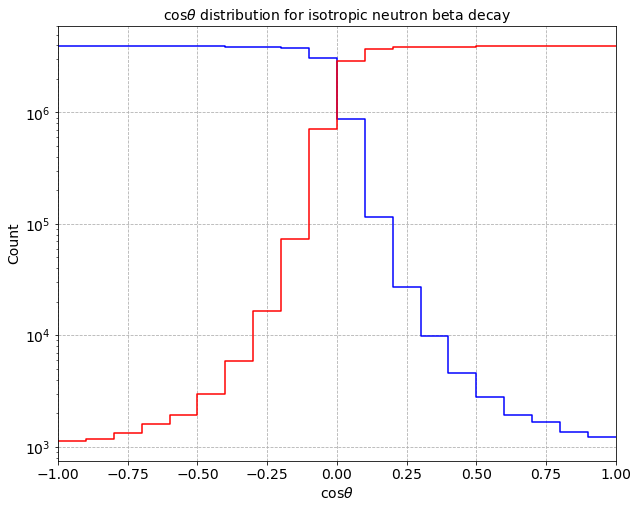

In [34]:
plt.figure(figsize = (10, 8))
sns.histplot(type02['pZe'], element='step',bins = 20,fill= False,color = 'blue',log_scale=(False, True), label ='Type02 ')
sns.histplot(type01['pZe'], element='step',bins = 20,fill= False,color = 'red',log_scale=(False, True), label ='Type01 ')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlim(-1,1)
plt.title(r'$\cos \theta$ distribution for isotropic neutron beta decay', fontsize = 14)
plt.xlabel(r'$\cos \theta$', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.grid(linestyle = '--')
plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_asymmetry_0.png')

plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_asymmetry_0.eps')


In [ ]:
misscatter_02_foil1_dep = type02[type02['eFoil1'] != 0]

In [ ]:
sns.histplot(misscatter_02_foil1_dep['eFoil1'], log_scale=(False, True))

In [ ]:
sns.histplot(misscatter_02_foil1_dep['pZe'], log_scale=(False, True)) # the left part is indicaing that there are events that were emitted in right direction but, still they were back-scattered and deposited energy in both the fols

In [ ]:
deposits_energy_foil1_emitted_negZ = misscatter_02_foil1_dep[misscatter_02_foil1_dep['pZe']< 0]
#sns.histplot( misscatter_02_foil1_dep['E2'], hue=misscatter_02_foil1_dep['pZe'])#deposit energy in foil1 and come back deposit in det 2

In [ ]:
kex, e2_avg = avgXvsY(deposits_energy_foil1_emitted_negZ, 'KE', 'E2', 100,0,100 )
plt.scatter(x = kex, y = e2_avg)

In [35]:
# type 02
# events that are emitted in opposite direction!
miscatter_type02 =type02[ type02['pZe'] > 0] # detected in 2, emitted +z 
miscatter_type01 =type01[ type01['pZe'] < 0]


Text(0.5, 1.0, '$<cos\\theta>$ distribution for misbackscattered Type 0 events')

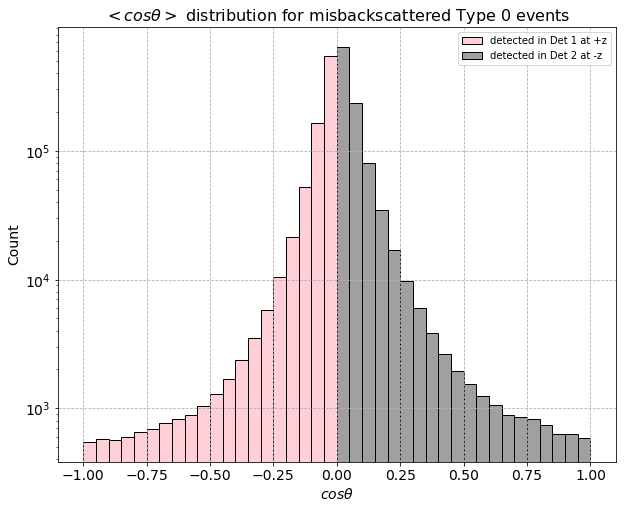

In [36]:
plt.figure(figsize = (10, 8))
sns.histplot(miscatter_type01['pZe'], bins = 20,  color = 'pink', fill = True, log_scale=(False, True), label = 'detected in Det 1 at +z')
sns.histplot(miscatter_type02['pZe'], bins = 20,  color = 'gray', fill = True, log_scale=(False, True), label = 'detected in Det 2 at -z')

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.xlabel(r'$cos\theta$', fontsize = 14)
plt.grid(linestyle = '--')
#plt.ylim(0, 1e7)
plt.title(r'$<cos\theta>$ distribution for misbackscattered Type 0 events', fontsize = 16)
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_Miscatter_type0.eps')

#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_Miscatter_type0.png')

In [37]:
# filter out the events that deposit energy in foil and  detector at direction opposite to the detetction
miscatter_detectedin2_scatter_foil1 = miscatter_type02[miscatter_type02['eFoil1'] != 0]
miscatter_detectedin1_scatter_foil2 = miscatter_type01[miscatter_type01['eFoil2'] != 0]

In [38]:
miscatter_detectedin2_scatter_foil1['Deposits Energy in Det 1'] = np.where(miscatter_detectedin2_scatter_foil1['dEeSilicon1'] != 0, 1, 0)
miscatter_detectedin1_scatter_foil2['Deposits Energy in Det 2'] = np.where(miscatter_detectedin1_scatter_foil2['dEeSilicon2'] != 0, 1, 0)

/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
miscatter_detectedin2_scatter_foil1.head()

In [10]:
hue_colors1 = {0: 'pink', 1: 'red'}
hue_colors2 = {0: 'gray', 1: 'blue'}

hue_labels1 = {0: 'No', 1: 'Yes'}
#hue_labels2 = {0: '', 1: 'deposits energy in Det 2'}


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


Text(0.5, 1.0, 'Energy deposited in foil at +z but detected in Detector at -z (misbackscattered Type 02 events)')

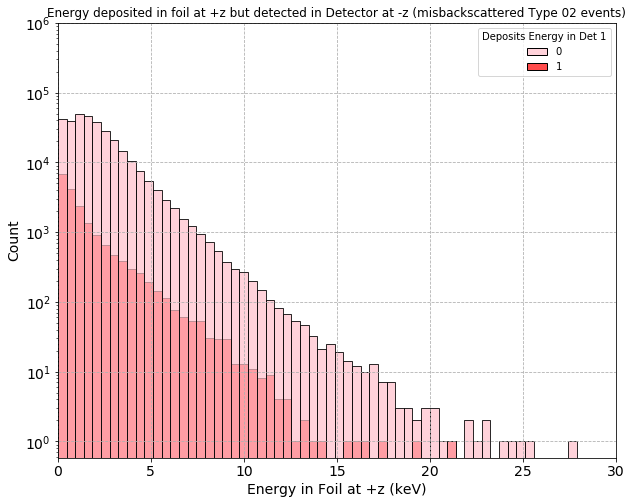

In [39]:
plt.figure(figsize = (10, 8))
sns.histplot(miscatter_detectedin2_scatter_foil1, x ='eFoil1', palette=hue_colors1, hue='Deposits Energy in Det 1', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)
#sns.histplot(miscatter_detectedin1_scatter_foil2, x ='eFoil2', palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = False, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

#sns.histplot(miscatter_detectedin1_scatter_foil2, x = 'eFoil2', color=hue_colors2, bins = 60, alpha = 0.7,  fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

#sns.histplot(miscatter_detectedin1_scatter_foil2[miscatter_detectedin1_scatter_foil2['dEeSilicon2'] > 0.0], bins = 60, alpha = 0.5, color = 'blue', fill = True, log_scale=(False, True), label = 'Deposits Det 2')
#sns.histplot(miscatter_detectedin2_scatter_foil1[miscatter_detectedin2_scatter_foil1['dEeSilicon1'] > 0.0], bins = 60, alpha = 0.5, color = 'yellow', fill = True, log_scale=(False, True), label = 'Deposits Det 1')


plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
#plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.grid(linestyle = '--')
plt.xlabel('Energy in Foil at +z (keV)', fontsize = 14)
plt.xlim(0, 30)
plt.ylim(0,1e6)
plt.title('Energy deposited in foil at +z but detected in Detector at -z (misbackscattered Type 02 events)', fontsize = 12)

#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/energy_dep_foil1_Miscatter_type02.eps')
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/energy_dep_foil1_Miscatter_type02.png')

/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


Text(0.5, 1.0, 'Energy deposited in foil at -z but detected in Detector at +z (misbackscattered Type 01 events)')

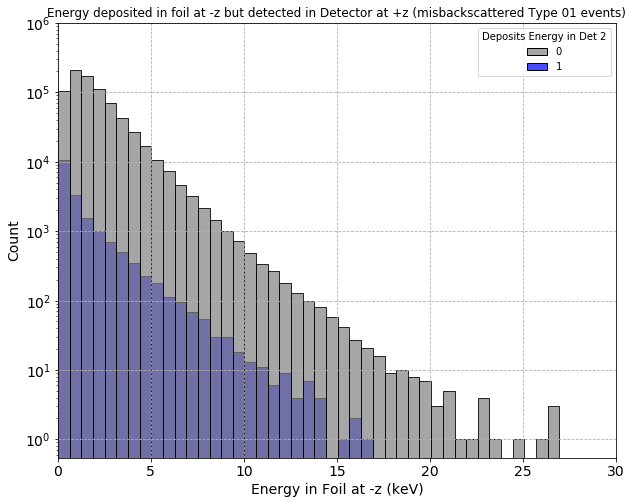

In [40]:
plt.figure(figsize = (10, 8))
#sns.histplot(miscatter_detectedin2_scatter_foil1, x ='eFoil1', palette=hue_colors1, hue='Deposits Energy in Det 1', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)
sns.histplot(miscatter_detectedin1_scatter_foil2, x ='eFoil2', palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

#sns.histplot(miscatter_detectedin1_scatter_foil2, x = 'eFoil2', color=hue_colors2, bins = 60, alpha = 0.7,  fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

#sns.histplot(miscatter_detectedin1_scatter_foil2[miscatter_detectedin1_scatter_foil2['dEeSilicon2'] > 0.0], bins = 60, alpha = 0.5, color = 'blue', fill = True, log_scale=(False, True), label = 'Deposits Det 2')
#sns.histplot(miscatter_detectedin2_scatter_foil1[miscatter_detectedin2_scatter_foil1['dEeSilicon1'] > 0.0], bins = 60, alpha = 0.5, color = 'yellow', fill = True, log_scale=(False, True), label = 'Deposits Det 1')


plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
#plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.grid(linestyle = '--')
plt.xlabel('Energy in Foil at -z (keV)', fontsize = 14)
plt.xlim(0, 30)
plt.ylim(0, 1e6)
plt.title('Energy deposited in foil at -z but detected in Detector at +z (misbackscattered Type 01 events)', fontsize = 12)

#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/energy_dep_foil2_Miscatter_type01.eps')
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/energy_dep_foil2_Miscatter_type01.png')

## dead events 

In [13]:
dead_foil_col = ['KE','cosTh','eFoil1','eFoil2']
dead_events_foil  = pd.read_csv('./energy-costh-deadevents-apr09/dead_events_foil_a=0.txt',  sep = " ",names = dead_foil_col, header = None)

In [ ]:
dead_events_foil

/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


Text(0.5, 1.0, '$cos\\theta$ distribution for the dead events')

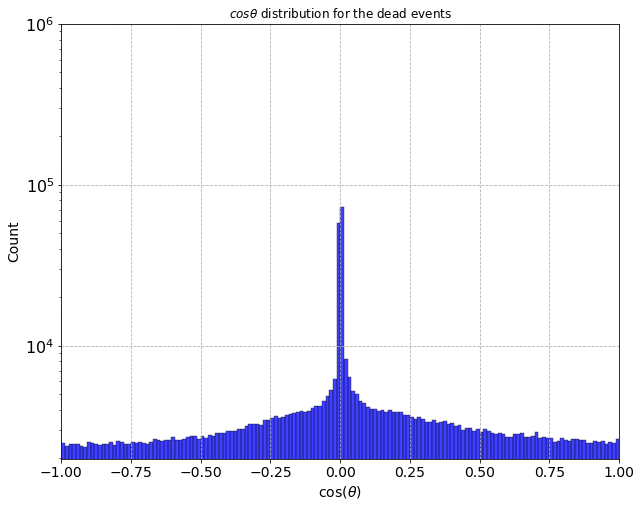

In [14]:
#sns.histplot(dead_events_foil['cosTh'], log_scale=(False, True))
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_foil, x ='cosTh', color = 'blue', fill = True, log_scale=(False, True),)#palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
#plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.grid(linestyle = '--')
plt.xlabel(r'$\cos(\theta)$', fontsize = 14)
plt.xlim(-1, 1)
plt.ylim(0, 1e6)
plt.yticks(fontsize = 16)
plt.title(r'$cos\theta$ distribution for the dead events', fontsize = 12)

#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_deadEvents.eps')
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_deadEvents.png')

/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


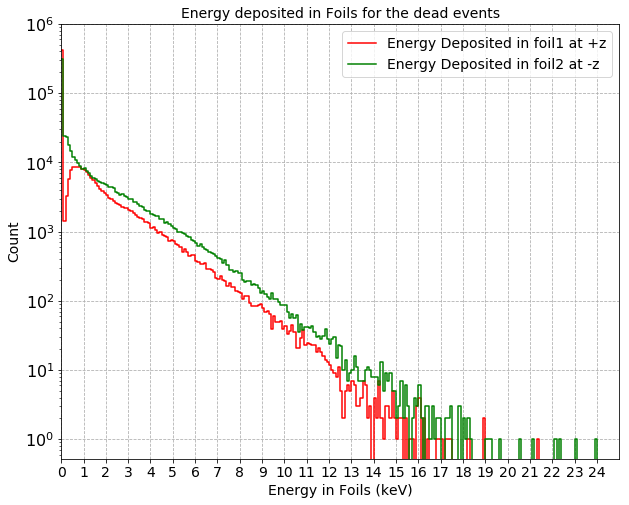

In [15]:
#sns.histplot(dead_events_foil['cosTh'], log_scale=(False, True))
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_foil, x ='eFoil1', color = 'red',  fill = False,element='step', log_scale=(False, True), bins = 250, binrange = (0,25),label = 'Energy Deposited in foil1 at +z',)#palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)
sns.histplot(dead_events_foil, x ='eFoil2', color = 'green',fill = False,element='step', log_scale=(False, True), bins = 250, binrange = (0,25),label = 'Energy Deposited in foil2 at -z',)#palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

plt.yticks(fontsize = 14 )
plt.xticks(np.arange(0,25,1),fontsize = 14)
#plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.grid(linestyle = '--')
plt.xlabel('Energy in Foils (keV)', fontsize = 14)
plt.ylim(0, 1e6)
plt.xlim(0,25)
plt.yticks(fontsize = 16)
plt.title('Energy deposited in Foils for the dead events', fontsize = 14)
plt.legend(fontsize = 14)
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/hist_energyDepFoils_deadEvents.eps')
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/hist_energyDepFoils_deadEvents.png')


In [18]:
noEnergyFoil = dead_events_foil[(dead_events_foil['eFoil1'] == 0) & (dead_events_foil['eFoil2'] == 0)]

/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


Text(0.5, 1.0, 'initial KE distribution for the dead events')

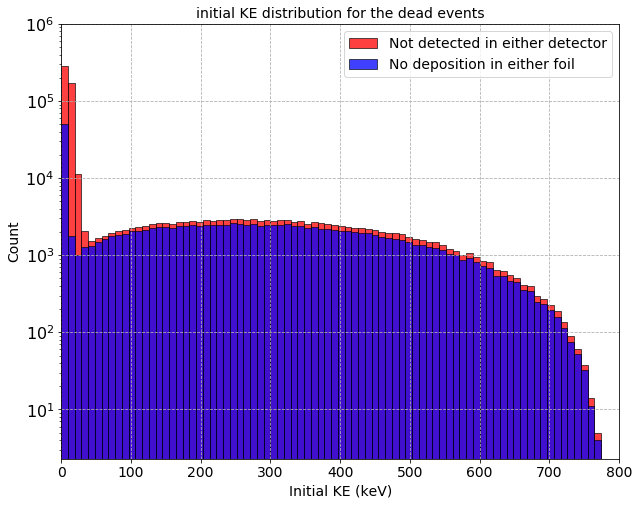

In [19]:
#sns.histplot(dead_events_foil['cosTh'], log_scale=(False, True))
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_foil, x ='KE', color = 'red', bins = 80,fill = True, log_scale=(False, True),label = 'Not detected in either detector')#palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)
sns.histplot(noEnergyFoil, x ='KE', color = 'blue', bins = 80,fill = True, log_scale=(False, True),label = 'No deposition in either foil')#palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
#plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.grid(linestyle = '--')
plt.xlabel('Initial KE (keV)', fontsize = 14)
plt.xlim(0, 800)
plt.ylim(0, 1e6)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 14)
plt.title('initial KE distribution for the dead events', fontsize = 14)

#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/initialKE_deadEvents.eps')
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/initialKE_deadEvents.png')

In [22]:

xke, y_avg = avgXvsY(noEnergyFoil, 'KE', 'cosTh', 80, 0, 800)
xke_dep, y_avg_dep = avgXvsY(dead_events_foil, 'KE', 'cosTh', 80, 0, 800 )


Text(0.5, 1.0, 'avg costheta vs initial KE for dead events')

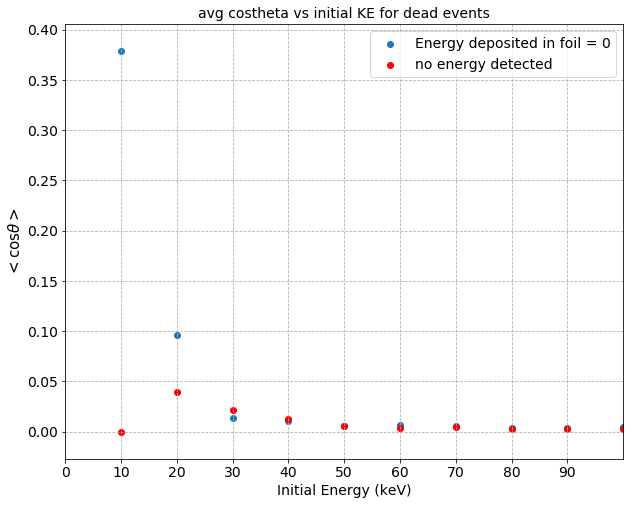

In [23]:
plt.figure(figsize = (10, 8))
plt.scatter(xke, y_avg,label ='Energy deposited in foil = 0')
#plt.yscale('log')
plt.scatter(xke_dep, y_avg_dep,color = 'red',label = 'no energy detected' )
plt.xlim(0,100)
plt.xticks(np.arange(0,100,10), fontsize = 14)
#plt.ylim(0,0.05)
plt.yticks(fontsize = 14)
plt.grid(linestyle = '--')
plt.xlabel('Initial Energy (keV)', fontsize = 14)
plt.ylabel(r'$<\cos \theta>$', fontsize = 15)
plt.legend(fontsize = 14)
plt.title(f'avg costheta vs initial KE for dead events', fontsize = 14)
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/zoom_dead_decaytrap_dead_events_cosTh_KE.png')
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/zoom_dead_decaytrap_dead_events_cosTh_KE.eps')


/home/rhythm/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


Text(0.5, 1.0, '$cos\\theta$ distribution for the dead events')

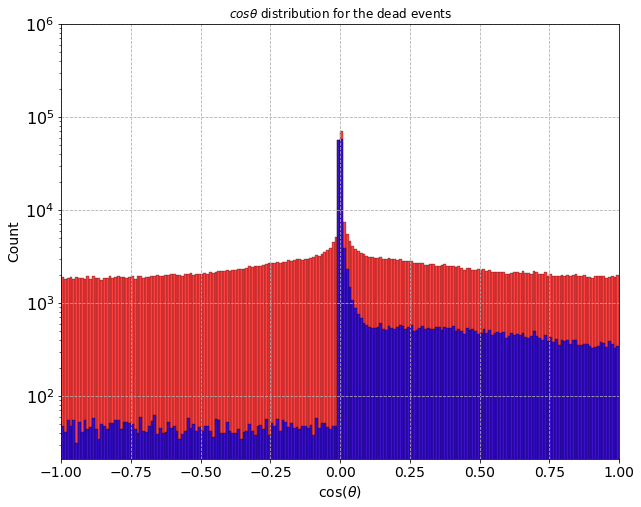

In [24]:
#sns.histplot(dead_events_foil['cosTh'], log_scale=(False, True))
plt.figure(figsize = (10, 8))
sns.histplot(dead_events_foil, x ='cosTh', color = 'red', bins = 200,fill = True, log_scale=(False, True),)#palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)
sns.histplot(noEnergyFoil, x ='cosTh', color = 'blue', bins = 200,fill = True, log_scale=(False, True),)#palette=hue_colors2, hue='Deposits Energy in Det 2', bins = 60, alpha = 0.7, fill = True, log_scale=(False, True), hue_order=  hue_labels1, legend=True)

plt.yticks(fontsize = 14 )
plt.xticks(fontsize = 14)
#plt.legend()
plt.ylabel('Count',fontsize = 14)
plt.grid(linestyle = '--')
plt.xlabel(r'$\cos(\theta)$', fontsize = 14)
plt.xlim(-1, 1)
plt.ylim(0, 1e6)
plt.yticks(fontsize = 16)
plt.title(r'$cos\theta$ distribution for the dead events', fontsize = 12)

#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_deadEvents.eps')
#plt.savefig(f'./energy-costh-deadevents-apr09/plot-enegrgy-foil-dep-apr15/cosTheta_deadEvents.png')